### CIS 9 - Lab 3a

Supervised Learning: Regression and Classification

In [3]:
# Name: Shweta Surendar

In this lab you will find and evaluate a machine learning model to predict a certain characteristic of a car, given the car's features.<br>
There are 2 parts to the lab: 
- Part A: find a machine learning model to predict the fuel consumption (mileage) of a car for city driving.
- Part B: find a machine learning model to predict the smog rating in the emission of the car.

For both parts you should use only the machine learning models and methodologies that we discuss in module 3.

In [358]:
# import modules here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree, model_selection, metrics
from sklearn.datasets import load_wine
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

__Part A__ <br>
Select, train, test, and evaluate an ML model to predict the fuel consumption of a car, given the car's engine size, number of cylinders, type of transmission, etc.<br>

The data is in the file `car.xlsx` ([source](https://www.kaggle.com/datasets/abhikdas2809/canadacaremissions))

1. __Read data in the file `car.xlsx` into a DataFrame.__<br>
Then __print the DataFrame__ (use graphical print) to inspect it.

In [359]:
data = pd.read_excel('car.xlsx')
data

,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,11.6,8.3,10.1,28.0,232.0,NaN,NaN
2,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,11.0,8.3,9.8,29.0,225.0,NaN,NaN
3,1995.0,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,10.8,8.3,9.7,29.0,223.0,NaN,NaN
4,1995.0,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,14.2,10.5,12.5,23.0,288.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26071,2022.0,Volvo,XC40 T5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.7,7.7,9.4,30.0,219.0,5.0,5.0
26072,2022.0,Volvo,XC60 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.5,8.1,9.4,30.0,219.0,5.0,5.0
26073,2022.0,Volvo,XC60 B6 AWD,SUV: Small,2.0,4.0,AS8,Z,11.0,8.7,9.9,29.0,232.0,5.0,7.0
26074,2022.0,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4.0,AS8,Z,11.5,8.4,10.1,28.0,236.0,5.0,5.0


2a. First, remove unnecessary data.<br>
__Remove the vehicle's make, model, and class__ since these names don't influence the fuel consumption.<br>
__Remove the last 6 columns__. The last 5 columns are data for the car emission, which don't affect fuel consumption, and the Fuel Consumption for Highway driving doesn't affect City driving.<br>
__Remove the first row with all NaN's__.<br>
Then __print the DataFrame__.

_It's less typing if you can remove the columns without having to type all their names_.

In [360]:
data = data.drop(data.columns[[1, 2, 3, 9, 10, 11, 12, 13, 14]], axis=1)
data = data.iloc[1:, :]
data

,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100)
1,1995.0,1.8,4.0,A4,X,11.6
2,1995.0,1.8,4.0,M5,X,11.0
3,1995.0,1.8,4.0,M5,Z,10.8
4,1995.0,3.2,6.0,A4,Z,14.2
5,1995.0,3.2,6.0,A4,Z,14.6
...,...,...,...,...,...,...
26071,2022.0,2.0,4.0,AS8,Z,10.7
26072,2022.0,2.0,4.0,AS8,Z,10.5
26073,2022.0,2.0,4.0,AS8,Z,11.0
26074,2022.0,2.0,4.0,AS8,Z,11.5


2b. __Check for NaN's__ that may be left.

In [361]:
nanCount = car_data.isna().sum()
print("NaN Count in each column:")
print(nanCount)
# There are no NaN's left 

NaN Count in each column:
year            0
size            0
cylinders       0
transmission    0
type            0
city            0
hwy             0
rating          0
dtype: int64


3. Next, simplify the column labels.<br>
__Remove the measurement units__ from the column labels, such as (L/100)<br>
Then __shorten the column labels__ to the last word of each label and __lowercase__ the word.<br>
__Print the first 5 rows__ of the DataFrame to check your work.

In [362]:
data.columns = [re.sub("\(.*?\)", "", column).split()[-1].lower() for column in data.columns]
data.iloc[0:5]

,year,size,cylinders,transmission,type,city
1,1995.0,1.8,4.0,A4,X,11.6
2,1995.0,1.8,4.0,M5,X,11.0
3,1995.0,1.8,4.0,M5,Z,10.8
4,1995.0,3.2,6.0,A4,Z,14.2
5,1995.0,3.2,6.0,A4,Z,14.6


4a. Prepare the data for the ML models.<br>
__Change the _year_ and _transmission_ to the `int` data type__ by using the astype method:<br>
Example: `df = df.astype({'column_labelA':'int', 'column_labelB': 'float'})`<br>
    will change column_labelA to int and column_labelB to float`<br>
Then __print the DataFrame__ to check your work.

In [363]:
data = data.astype({'year':'int'})
data

,year,size,cylinders,transmission,type,city
1,1995,1.8,4.0,A4,X,11.6
2,1995,1.8,4.0,M5,X,11.0
3,1995,1.8,4.0,M5,Z,10.8
4,1995,3.2,6.0,A4,Z,14.2
5,1995,3.2,6.0,A4,Z,14.6
...,...,...,...,...,...,...
26071,2022,2.0,4.0,AS8,Z,10.7
26072,2022,2.0,4.0,AS8,Z,10.5
26073,2022,2.0,4.0,AS8,Z,11.0
26074,2022,2.0,4.0,AS8,Z,11.5


4b. To use ML models, strings need to change to numeric values.<br>
__Change the data in the _transmission_ and _type_ columns to integers__.<br>
Then __print the DataFrame__ to check your work.

_Refer to the Pandas exercise notebook for a way to change values of a column_

In [364]:
# Change the data in the transmission column to a value 1-30
keyList = data['transmission'].unique()     #only assigning a new number for every unique value
myDict = {key: None for key in keyList}
keyIndex = 1
for key in myDict:
    myDict[key] = keyIndex
    keyIndex = keyIndex + 1
data = data.replace(myDict)
data = data.astype({'transmission': 'int'})
#Change the data in the type column to integers 1-5 to represent the letters X, Z, D, N, E
type1 = {'X': 1}
data = data.replace(type1)
type2 = {'Z': 2}
data = data.replace(type2)
type3 = {'D': 3}
data = data.replace(type3)
type4 = {'N': 4}
data = data.replace(type4)
type5 = {'E': 5}
data = data.replace(type5)
data = data.astype({'type': 'int'})   #change data to int
data

,year,size,cylinders,transmission,type,city
1,1995,1.8,4.0,1,1,11.6
2,1995,1.8,4.0,2,1,11.0
3,1995,1.8,4.0,2,2,10.8
4,1995,3.2,6.0,1,2,14.2
5,1995,3.2,6.0,1,2,14.6
...,...,...,...,...,...,...
26071,2022,2.0,4.0,16,2,10.7
26072,2022,2.0,4.0,16,2,10.5
26073,2022,2.0,4.0,16,2,11.0
26074,2022,2.0,4.0,16,2,11.5


5. __Create the X and y datasets__, given that we want to predict the city mileage.<br>
Then __print X and y__.

In [365]:
X = features = data.drop(columns='city')
y = data['city']
display(X)
display(y)

,year,size,cylinders,transmission,type
1,1995,1.8,4.0,1,1
2,1995,1.8,4.0,2,1
3,1995,1.8,4.0,2,2
4,1995,3.2,6.0,1,2
5,1995,3.2,6.0,1,2
...,...,...,...,...,...
26071,2022,2.0,4.0,16,2
26072,2022,2.0,4.0,16,2
26073,2022,2.0,4.0,16,2
26074,2022,2.0,4.0,16,2


1        11.6
2        11.0
3        10.8
4        14.2
5        14.6
         ... 
26071    10.7
26072    10.5
26073    11.0
26074    11.5
26075    12.4
Name: city, Length: 26075, dtype: float64

6a. Of all the X features, determine if any of them can be removed because there's no correlation with the city mileage.<br>
To do this, __create one plot with multiple subplots__, one subplot per X feature, __to show correlation between each X feature and the y label__.<br>
Each subplot should have a title, x-label, and y-label so it's clear which feature it is.

_Note 1: you should use matplotlib to create the subplots as shown in the matplotlib exercise notebook._<br>
_Note 2: use a loop to create the subplots, don't repeat the same lines of code for each subplot_

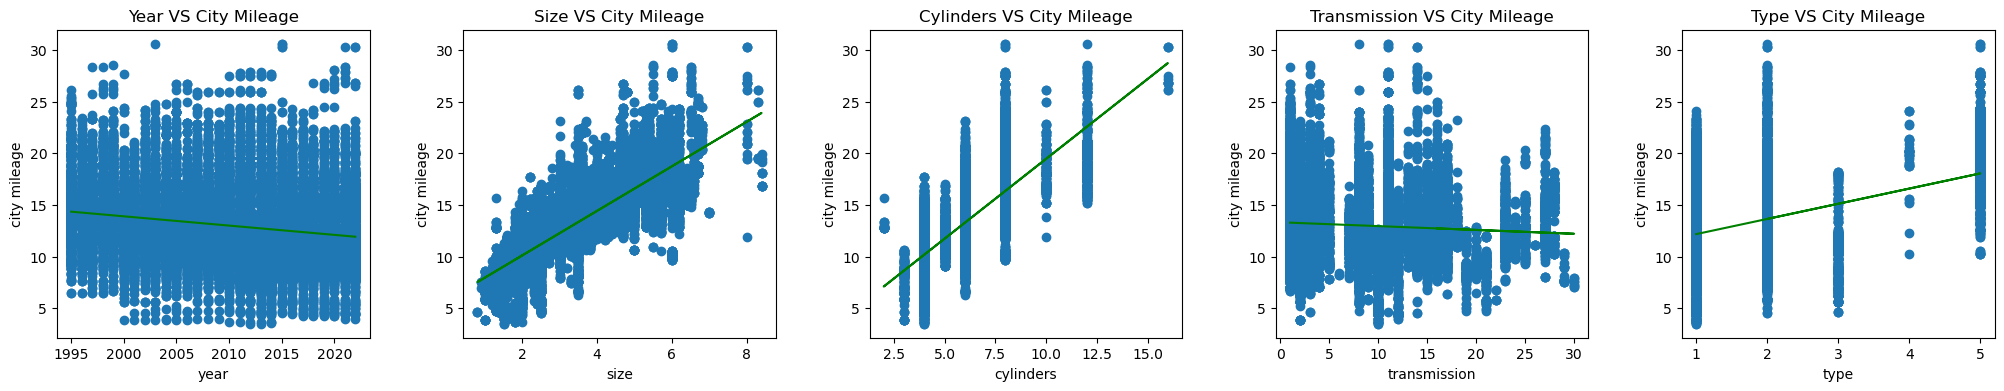

In [366]:
subplotCount = 1
for column in data.drop(columns=['city']).columns:
    plt.subplot(1,5, subplotCount)
    plt.scatter(data[column], data.city)
    plt.title(str("" + str(column).capitalize() + " VS City Mileage"))
    plt.xlabel(column)
    plt.ylabel('city mileage')
    subplotCount = subplotCount + 1
    
    regr = lm.LinearRegression()
    all_columns = ['year', 'size', 'cylinders', 'transmission', 'type', 'city']
    all_columns.remove(str(column))
    X = data.drop(columns = all_columns)
    y = data.city
    regr = regr.fit(X,y)
    plt.plot(X, regr.coef_ * X + regr.intercept_, color='green')
plt.rcParams['figure.figsize'] = [25, 4]
plt.subplots_adjust(wspace=0.3)
plt.show()

6b. From the subplots above, determine if any X feature has no correlation to the city driving fuel consumption.<br>
Then __drop any column__ where you observe no correlation.<br>
__Print the first 5 rows of X__.

In [367]:
data = data.drop(columns=['year', 'transmission', 'type'])
data.iloc[0:5]

,size,cylinders,city
1,1.8,4.0,11.6
2,1.8,4.0,11.0
3,1.8,4.0,10.8
4,3.2,6.0,14.2
5,3.2,6.0,14.6


7. __Create the training and testing X and y datasets__.<br>
Then __print the shape of each set__.

In [368]:
X = data.drop(columns='city')
y = data.city
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19556, 2) (6519, 2) (19556,) (6519,)


8. Of all ML models that we've discussed in the Module 3a exercise, choose the <u>appropriate</u> type of model to train, test, and evaluate the accuracy.<br>
__Create additional code cells below for each model__ to train, test, and evaluate it.

In [369]:
# Multiple Regression 
regr = lm.LinearRegression()
regr = regr.fit(X_train, y_train)
coeff = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])
coeff

,Coefficient
size,1.594180
cylinders,0.468579


In [370]:
y_pred = regr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
9310,12.5,12.702616
22321,14.9,18.581733
5406,11.0,10.330696
1562,14.9,10.799275
22078,10.7,13.340288
...,...,...
7870,17.9,16.190463
25183,10.0,10.011860
20554,8.4,13.340288
21507,13.7,13.021452


In [371]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
priceMean = np.mean(y)
print("MULTI-LINEAR REGRESSION:")
print('Root Mean Squared Error:',round(RMSE,2),"or",round(RMSE/priceMean*100),"percent error")
print('R^2 value:', round(regr.score(X,y),2))

MULTI-LINEAR REGRESSION:
Root Mean Squared Error: 2.06 or 16 percent error
R^2 value: 0.67


In [372]:
# Decision Tree Regression
regressor = DecisionTreeRegressor() 
regressor.fit(X, y)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
9310,12.5,13.152809
22321,14.9,17.358313
5406,11.0,11.212295
1562,14.9,14.900000
22078,10.7,12.553815
...,...,...
7870,17.9,16.789157
25183,10.0,10.133952
20554,8.4,12.553815
21507,13.7,13.866469


In [373]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
priceMean = np.mean(y)
print("DECISION TREE REGRESSION:")
print('Root Mean Squared Error:',round(RMSE,2),"or",round(RMSE/priceMean*100),"percent error")
print('R^2 value:', round(regr.score(X,y),2))

DECISION TREE REGRESSION:
Root Mean Squared Error: 1.86 or 14 percent error
R^2 value: 0.67


9. __Create a Raw NBConvert cell__ to discuss which model you would choose for this application and why.

__Part B__ <br>
Select, train, test, and evluate an ML model to predict the smog rating of a car, given the car attributes.<br>
The smog rating is on a scale of 1 (worst) to 10 (best).

The input file is the same `car.xlsx` 

1. __Read from the `car.xlsx` file into a DataFrame__.<br>
Then __print the DataFrame__.

In [374]:
car_data = pd.read_excel('car.xlsx')
car_data

,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,11.6,8.3,10.1,28.0,232.0,NaN,NaN
2,1995.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,11.0,8.3,9.8,29.0,225.0,NaN,NaN
3,1995.0,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,10.8,8.3,9.7,29.0,223.0,NaN,NaN
4,1995.0,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,14.2,10.5,12.5,23.0,288.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26071,2022.0,Volvo,XC40 T5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.7,7.7,9.4,30.0,219.0,5.0,5.0
26072,2022.0,Volvo,XC60 B5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.5,8.1,9.4,30.0,219.0,5.0,5.0
26073,2022.0,Volvo,XC60 B6 AWD,SUV: Small,2.0,4.0,AS8,Z,11.0,8.7,9.9,29.0,232.0,5.0,7.0
26074,2022.0,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4.0,AS8,Z,11.5,8.4,10.1,28.0,236.0,5.0,5.0


2a. Remove unnecessary data.<br>
__Remove the vehicle's make, model, class__ since these names don't influence the smog rating.<br>
__Remove the COMB and CO2 columns__ since we're looking at smog level, not CO2.<br>
__Remove the first row which has all NaNs__.
__Print the DataFrame__.

_It's less typing if you can remove the columns without having to type their names._

In [375]:
car_data = car_data.drop(car_data.columns[[1, 2, 3, 10, 11, 12, 13]], axis =1)
car_data = car_data.iloc[1:, :]
car_data

,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),Smog Rating
1,1995.0,1.8,4.0,A4,X,11.6,8.3,NaN
2,1995.0,1.8,4.0,M5,X,11.0,8.3,NaN
3,1995.0,1.8,4.0,M5,Z,10.8,8.3,NaN
4,1995.0,3.2,6.0,A4,Z,14.2,10.5,NaN
5,1995.0,3.2,6.0,A4,Z,14.6,11.0,NaN
...,...,...,...,...,...,...,...,...
26071,2022.0,2.0,4.0,AS8,Z,10.7,7.7,5.0
26072,2022.0,2.0,4.0,AS8,Z,10.5,8.1,5.0
26073,2022.0,2.0,4.0,AS8,Z,11.0,8.7,7.0
26074,2022.0,2.0,4.0,AS8,Z,11.5,8.4,5.0


2b. __Print how many NaN's__ there are.

In [376]:
nanCount = car_data.isna().sum()
print(nanCount)

MODEL YEAR                           0
ENGINE SIZE (L)                      0
CYLINDERS                            0
TRANSMISSION                         0
FUEL TYPE                            0
FUEL CONSUMPTION CITY (L/100)        0
FUEL CONSUMPTION HWY (L/100)         0
Smog Rating                      20014
dtype: int64


2c. __Remove the rows with Nan's__.<br>
Then __print the DataFrame__ to check your work.

In [377]:
car_data = car_data.dropna()
display(car_data)

nanCount = car_data.isna().sum()
print("Count of Nan's\n\n", nanCount, sep='')


,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),Smog Rating
20015,2017.0,2.4,4.0,AM8,Z,9.4,6.8,6.0
20016,2017.0,3.5,6.0,AS9,Z,12.6,9.0,6.0
20017,2017.0,3.5,6.0,AS9,Z,12.2,9.0,6.0
20018,2017.0,3.0,6.0,AM7,Z,9.1,9.0,6.0
20019,2017.0,3.5,6.0,AM9,Z,11.1,10.8,6.0
...,...,...,...,...,...,...,...,...
26071,2022.0,2.0,4.0,AS8,Z,10.7,7.7,5.0
26072,2022.0,2.0,4.0,AS8,Z,10.5,8.1,5.0
26073,2022.0,2.0,4.0,AS8,Z,11.0,8.7,7.0
26074,2022.0,2.0,4.0,AS8,Z,11.5,8.4,5.0


Count of Nan's

MODEL YEAR                       0
ENGINE SIZE (L)                  0
CYLINDERS                        0
TRANSMISSION                     0
FUEL TYPE                        0
FUEL CONSUMPTION CITY (L/100)    0
FUEL CONSUMPTION HWY (L/100)     0
Smog Rating                      0
dtype: int64


3. Next, simplify the column labels.<br>
__Remove the measurement units__ from the column labels, such as (L/100)<br>
Then __shorten the column labels__ to the last word of each label and __lowercase__ the word.<br>
__Print the first 5 rows__ of the DataFrame to check your work.

In [378]:
car_data.columns = [re.sub("\(.*?\)", "", column).split()[-1].lower() for column in car_data.columns]
car_data.iloc[0:5]

,year,size,cylinders,transmission,type,city,hwy,rating
20015,2017.0,2.4,4.0,AM8,Z,9.4,6.8,6.0
20016,2017.0,3.5,6.0,AS9,Z,12.6,9.0,6.0
20017,2017.0,3.5,6.0,AS9,Z,12.2,9.0,6.0
20018,2017.0,3.0,6.0,AM7,Z,9.1,9.0,6.0
20019,2017.0,3.5,6.0,AM9,Z,11.1,10.8,6.0


4a. Prepare the data for the ML model.<br>
__Change the _year_ and _rating_ data to int__.<br>
Then __print the DataFrame__.

In [379]:
car_data = car_data.astype({'year':'int', 'rating': 'int'})
car_data

,year,size,cylinders,transmission,type,city,hwy,rating
20015,2017,2.4,4.0,AM8,Z,9.4,6.8,6
20016,2017,3.5,6.0,AS9,Z,12.6,9.0,6
20017,2017,3.5,6.0,AS9,Z,12.2,9.0,6
20018,2017,3.0,6.0,AM7,Z,9.1,9.0,6
20019,2017,3.5,6.0,AM9,Z,11.1,10.8,6
...,...,...,...,...,...,...,...,...
26071,2022,2.0,4.0,AS8,Z,10.7,7.7,5
26072,2022,2.0,4.0,AS8,Z,10.5,8.1,5
26073,2022,2.0,4.0,AS8,Z,11.0,8.7,7
26074,2022,2.0,4.0,AS8,Z,11.5,8.4,5


4b. __Change the strings in _transmission_ and _type_ to int__.<br>
Then __print the DataFrame__.

In [380]:
#Change the data in the transmission column
keyList2 = car_data['transmission'].unique()
myDict2 = {key: None for key in keyList2}
keyIndex2 = 1
for key in myDict:
    myDict2[key] = keyIndex2
    keyIndex2 = keyIndex2 + 1
car_data = car_data.replace(myDict)
car_data = car_data.astype({'transmission': 'int'}) 
#Change the data in the type column to integers 1-5 to represent the letters X, Z, D, N, E
type1 = {'X': 1}
car_data = car_data.replace(type1)
type2 = {'Z': 2}
car_data =car_data.replace(type2)
type3 = {'D': 3}
car_data = car_data.replace(type3)
type4 = {'N': 4}
car_data = car_data.replace(type4)
type5 = {'E': 5}
car_data = car_data.replace(type5)
car_data = car_data.astype({'type': 'int'})   #change data to int
car_data

,year,size,cylinders,transmission,type,city,hwy,rating
20015,2017,2.4,4.0,25,2,9.4,6.8,6
20016,2017,3.5,6.0,24,2,12.6,9.0,6
20017,2017,3.5,6.0,24,2,12.2,9.0,6
20018,2017,3.0,6.0,14,2,9.1,9.0,6
20019,2017,3.5,6.0,26,2,11.1,10.8,6
...,...,...,...,...,...,...,...,...
26071,2022,2.0,4.0,16,2,10.7,7.7,5
26072,2022,2.0,4.0,16,2,10.5,8.1,5
26073,2022,2.0,4.0,16,2,11.0,8.7,7
26074,2022,2.0,4.0,16,2,11.5,8.4,5


5. __Print each unique _rating_ value and its number of occurrences in the column__.

In [381]:
print("Value & Number of Occurences")
car_data['rating'].value_counts()

Value & Number of Occurences


5    1834
3    1649
6    1047
7     935
1     477
8     112
2       7
Name: rating, dtype: int64

6. __Create the X and y datasets__, given that we want to predict the smog rating.<br>
Then __print X and y__.

In [382]:
y = car_data.rating
X = car_data.drop(columns=['rating'])

display(y)
display(X.head(5))

20015    6
20016    6
20017    6
20018    6
20019    6
        ..
26071    5
26072    5
26073    7
26074    5
26075    7
Name: rating, Length: 6061, dtype: int32

,year,size,cylinders,transmission,type,city,hwy
20015,2017,2.4,4.0,25,2,9.4,6.8
20016,2017,3.5,6.0,24,2,12.6,9.0
20017,2017,3.5,6.0,24,2,12.2,9.0
20018,2017,3.0,6.0,14,2,9.1,9.0
20019,2017,3.5,6.0,26,2,11.1,10.8


7. __Create the training and testing X and y__ datasets.<br>
Then __print the shape__ of the datasets.

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4545, 7) (1516, 7) (4545,) (1516,)


8. Of all ML models that we've discussed in the Module 3a exercise, choose the <u>appropriate</u> type of model to train, test, and evaluate the accuracy.<br>
__Create additional code cells below for each model__ to train, test, and evaluate it.

_Note 1: make sure you show all the accuracy evaluations for this type of models_.<br>
_Note 2: if you do any tuning of a model, make sure to show why you choose a particular value for the model_.

In [384]:
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()
    ]

In [385]:
classifier_results=[]
for classifier in classifiers:
    # train the classifier
    classifier.fit(X_train, y_train)  
    # test the trained classifier
    y_output = classifier.predict(X_test)
    # compare the predicted output with the actual output
    print(classifier)
    score = f1_score(y_test, y_output, average='weighted')
    mean_accuracy_score = round(classifier.score(X,y),3)
    accuracy_score = round(metrics.accuracy_score(y_test, y_output), 3)
    print(f" f1_score: {score:.3f}\n mean accuracy score: {mean_accuracy_score}\n accuracy_score: {accuracy_score}")
    
    classifier_results.append({'classifier_model': str(classifier), 'f1_score': score, 'mean_accuracy_score': mean_accuracy_score, 'accuracy_score': accuracy_score})

C:\Users\shwet\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier()


C:\Users\shwet\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


 f1_score: 0.691
 mean accuracy score: 0.794
 accuracy_score: 0.694
DecisionTreeClassifier()
 f1_score: 0.814
 mean accuracy score: 0.95
 accuracy_score: 0.814
RandomForestClassifier()
 f1_score: 0.838
 mean accuracy score: 0.956
 accuracy_score: 0.838
GaussianNB()
 f1_score: 0.351
 mean accuracy score: 0.376
 accuracy_score: 0.385


In [386]:
results = pd.DataFrame(classifier_results)
results.sort_values(by='f1_score', ascending=False)

,classifier_model,f1_score,mean_accuracy_score,accuracy_score
2,RandomForestClassifier(),0.837763,0.956,0.838
1,DecisionTreeClassifier(),0.813717,0.950,0.814
0,KNeighborsClassifier(),0.691252,0.794,0.694
3,GaussianNB(),0.351411,0.376,0.385


In [387]:
results.sort_values(by='mean_accuracy_score', ascending=False)

,classifier_model,f1_score,mean_accuracy_score,accuracy_score
2,RandomForestClassifier(),0.837763,0.956,0.838
1,DecisionTreeClassifier(),0.813717,0.950,0.814
0,KNeighborsClassifier(),0.691252,0.794,0.694
3,GaussianNB(),0.351411,0.376,0.385


In [388]:
results.sort_values(by='accuracy_score', ascending=False)

,classifier_model,f1_score,mean_accuracy_score,accuracy_score
2,RandomForestClassifier(),0.837763,0.956,0.838
1,DecisionTreeClassifier(),0.813717,0.950,0.814
0,KNeighborsClassifier(),0.691252,0.794,0.694
3,GaussianNB(),0.351411,0.376,0.385


9. __Create a Raw NBConvert cell__ to discuss which model you would choose for this application and why.